In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('imputed_test_vals.csv')
df.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,Loyal Customer,36.0,Business travel,Business,532.0,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425.0,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832.0,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352.0,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610.0,17.0,0.0


In [3]:
df['Travel_Class'] = df['Travel_Class'].map({
    'Business':1,
    'Eco':2
})

In [4]:
df['CustomerType'] = df['CustomerType'].map({
    'nan':'',
    'Loyal Customer':1,
    'disloyal Customer':2
})

In [5]:
df['TypeTravel'] = df['TypeTravel'].map({
    'nan':'',
    'Personal Travel':1,
    'Business travel':2
})

In [6]:
df['Gender'] = df['Gender'].map({
    'nan':'',
    'Female':1,
    'Male':2
})

In [7]:
map_values = {
    'nan':'',
    'extremely poor':1,  
     'poor':2,
    'good':3,
    'acceptable':4,
    'need improvement':5,
    'excellent':6,   
}

In [8]:
services = ['Seat_comfort', 'Arrival_time_convenient', 'Catering', 'Onboardwifi_service', 'Online_support',
           'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service',
           'Cleanliness', 'Online_boarding', 'Onboard_entertainment']

In [9]:
df['Seat_Class'] = df['Seat_Class'].map({
    'Green Car': 1,
    'Ordinary' : 0,
})

In [10]:
df['Platform_location'] = df['Platform_location'].map({
    'nan':'',
    'very inconvinient':1,
    'need improvement':3,
    'Inconvinient':2,   
    'manageable':4,     
    'Convinient':5, 
    'very convinient':6,
})

In [11]:
for service in services:
    df[service] = df[service].map(map_values)

In [12]:
df.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,4,1,4,4,4,5,6,3,6,...,6,2,1,1,36.0,2,1,532.0,0.0,0.0
1,99900002,1,0,3,2,4,4,2,4,4,...,6,4,1,2,21.0,2,1,1425.0,9.0,28.0
2,99900003,6,0,6,6,6,6,6,6,5,...,5,6,2,1,60.0,2,1,2832.0,0.0,0.0
3,99900004,4,1,6,4,6,2,4,6,2,...,6,2,1,1,29.0,1,2,1352.0,0.0,0.0
4,99900005,6,0,1,6,3,6,6,6,6,...,6,6,2,2,18.0,2,1,1610.0,17.0,0.0


In [13]:
df.set_index('ID',inplace= True)

In [14]:
df.to_csv('Encoded_testdata.csv', index= False)

<AxesSubplot:>

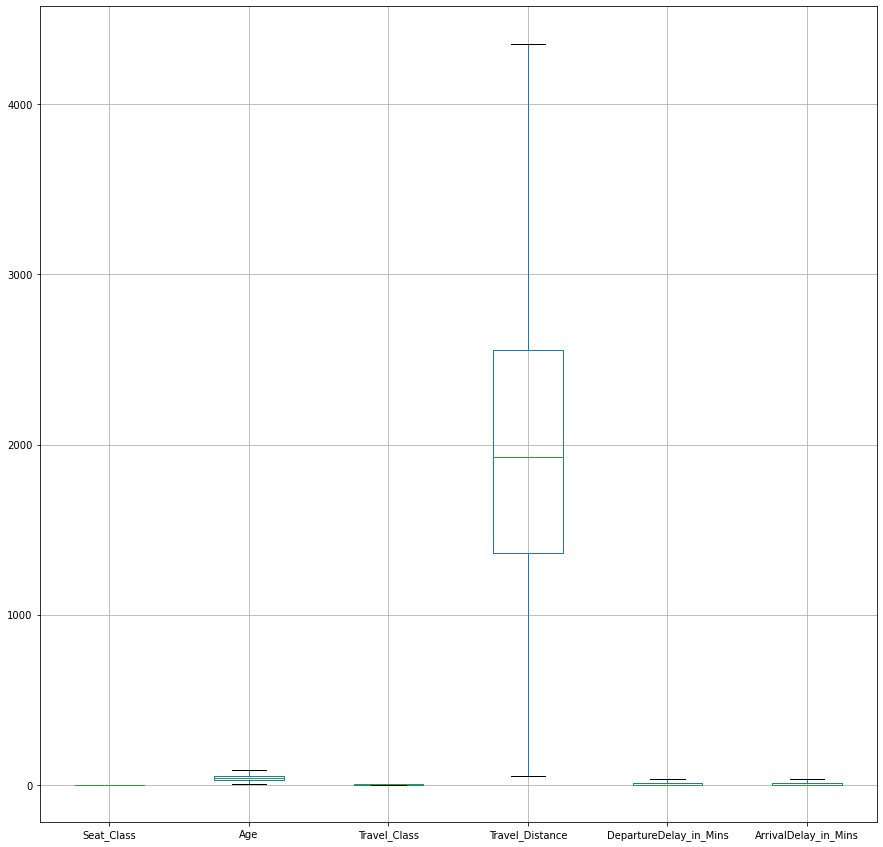

In [15]:
plt.figure(figsize = (15,15))
df.boxplot()